In [140]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [2]:
image = np.array(plt.imread('lena.png'))

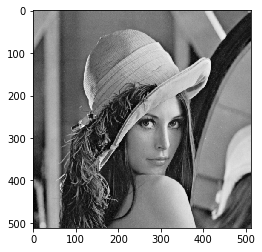

In [6]:
plt.imshow(image, cmap=plt.cm.gray)

In [141]:
def gaussian(kernel,size_x,size_y,x_mean,y_mean,argv):
    std = argv[0]
    for x in range(size_x):
        for y in range(size_y):
            x_coord = x-x_mean
            y_coord = y-y_mean
            kernel[x][y] = math.exp(-(x_coord**2+y_coord**2)/(2*std**2))/(2*math.pi*std**2)
    return kernel

In [142]:
def kernel2D(size_x,size_y,kernel_equation,*argv):
    kernel = np.zeros((size_x,size_y))
    x_mean = int((size_x+1)/2)-1
    y_mean = int((size_y+1)/2)-1
    kernel = kernel_equation(kernel,size_x,size_y,x_mean,y_mean,argv)
    return kernel
gaussian_kernel = kernel2D(3,3,gaussian,1/(2*math.log(2)))
# kernel = kernel2D(21,21,10)
print(kernel)

[[0.04476089 0.11700781 0.04476089]
 [0.11700781 0.30586589 0.11700781]
 [0.04476089 0.11700781 0.04476089]]


In [143]:
def convolve2D(kernel,image):
    # flip the kernel
    kernel = kernel[::-1,::-1]
    new_image = np.zeros((image.shape[0],image.shape[1]))
    # compute half of kernel dimensions
    half_x,half_y = int(kernel.shape[0]/2), int(kernel.shape[1]/2)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            x_min,x_max,y_min,y_max = max(0,x-half_x),min(image.shape[0]-1,x+half_x),max(0,y-half_y),min(image.shape[1]-1,y+half_y)
            image_part = image[x_min:x_max+1,y_min:y_max+1]
            kernel_part = kernel[half_x+x_min-x:half_x+x_max-x+1,half_y+y_min-y:half_y+y_max-y+1]
#             print(x_min,x_max,y_min,y_max)
#             print(image_part.shape)
#             print(kernel_part.shape)
            new_image[x,y] = np.multiply(image_part,kernel_part).sum()
            
    return (new_image)
gaussian_image = convolve2D(gaussian_kernel,image)


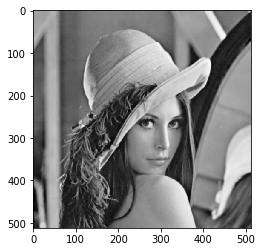

In [144]:
plt.imshow(new_image,cmap=plt.cm.gray)
plt.imsave(fname = 'report_img/lena_gaussian.png',arr = new_image,cmap=plt.cm.gray)

In [137]:
kx = np.array([-0.5,0,0.5])
ky = np.array([-0.5,0,0.5])
def find_edge_x(kernel1D,image):
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for x in range(image.shape[0]):
        new_image[x] = np.convolve(image[x],kernel1D)[1:-1]
    return new_image
def find_edge_y(kernel1D,image):
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for y in range(image.shape[1]):
        new_image[:,y] = np.convolve(image[:,y],kernel1D)[1:-1]
    return new_image
x_original = find_edge_x(kx,image)
y_original = find_edge_y(ky,image)
x_gaussian = find_edge_x(kx,gaussian_image)
y_gaussian = find_edge_y(ky,gaussian_image)

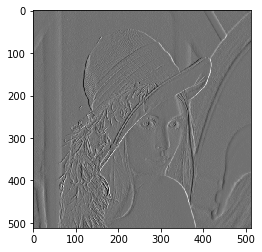

In [145]:
plt.imshow(x_image,cmap = plt.cm.gray)
plt.imsave(fname = 'report_img/edge_x.png',arr = x_image,cmap=plt.cm.gray)

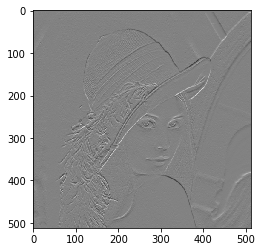

In [146]:
plt.imshow(y_image,cmap = plt.cm.gray)
plt.imsave(fname = 'report_img/edge_y.png',arr = y_image,cmap=plt.cm.gray)

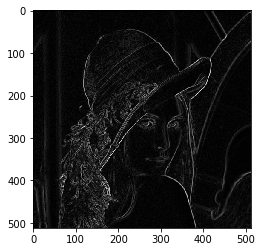

In [147]:
def gradient_magnitude(image,kx,ky):
    x_image = find_edge_x(kx,image)
    y_image = find_edge_y(ky,image)
    ret_image = np.sqrt(x_image**2+y_image**2)
    return ret_image
grad_origin = gradient_magnitude(image,kx,ky)
plt.imshow(grad_origin,cmap=plt.cm.gray)
plt.imsave(fname = 'report_img/grad_original.png',arr = grad_origin,cmap=plt.cm.gray)

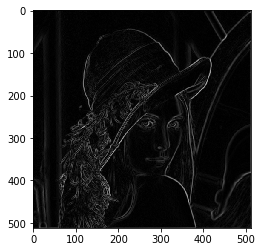

In [148]:
grad_gaussian = gradient_magnitude(gaussian_image,kx,ky)
plt.imshow(grad_gaussian,cmap=plt.cm.gray)
plt.imsave(fname = 'report_img/grad_gaussian.png',arr = grad_gaussian,cmap=plt.cm.gray)